In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns

In [35]:
df = pd.read_csv("mail_data.csv")

In [36]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [37]:
df = df.dropna(subset=['Category'])
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

In [39]:
X = df['Message']
Y = df['Category']


In [40]:
print(df['Category'].unique())

[1 0]


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [43]:
print(Y_test)

2632    0
454     1
983     0
1282    1
4610    1
       ..
4827    1
5291    1
3325    1
3561    1
1136    1
Name: Category, Length: 1115, dtype: int64


In [45]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [48]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [50]:
print(Y_train)

3075    1
1787    1
1614    1
4304    1
3266    0
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 4457, dtype: int64


In [53]:
model = Sequential()
model.add(Input(shape=(X_train_features.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [56]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │         475,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,761 (1.82 MB)

 Trainable params: 477,761 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
cb = ModelCheckpoint('spam_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

In [68]:
epochs = 50
batch_size = 32

In [ ]:
history = model.fit(X_train_features, Y_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.2, callbacks=[cb])

Epoch 1/50
109/112 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 4.0712e-08
Epoch 1: val_accuracy did not improve from 0.98655
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 1.0000 - loss: 4.1052e-08 - val_accuracy: 0.9765 - val_loss: 0.1621
Epoch 2/50
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 4.6476e-08
Epoch 2: val_accuracy did not improve from 0.98655
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 4.6498e-08 - val_accuracy: 0.9765 - val_loss: 0.1627
Epoch 3/50
108/112 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 4.8014e-08
Epoch 3: val_accuracy did not improve from 0.98655
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 4.7904e-08 - val_accuracy: 0.9765 - val_loss: 0.1633
Epoch 4/50
110/112 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 4.3396e-08
Epoch 4: val_accuracy did not improve from 0.98655
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 4

In [72]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

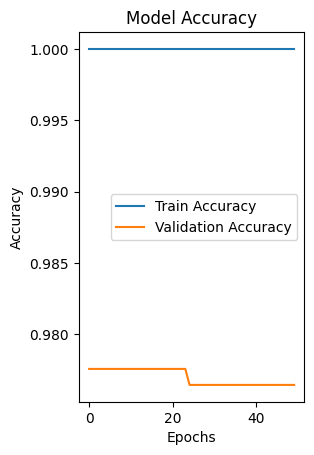

In [74]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

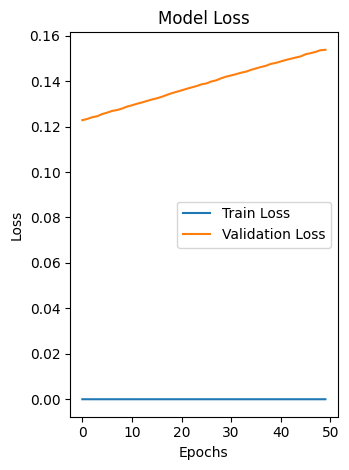

In [76]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
from tensorflow.keras.models import load_model
best_model = load_model('spam_model.keras')

In [80]:
y_pred = best_model.predict(X_test_features)
y_pred = np.ravel((y_pred >= 0.5).astype('int'))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [82]:
print(f'Accuracy on test data: {accuracy_score(Y_test, y_pred)}')

Accuracy on test data: 0.9856502242152466


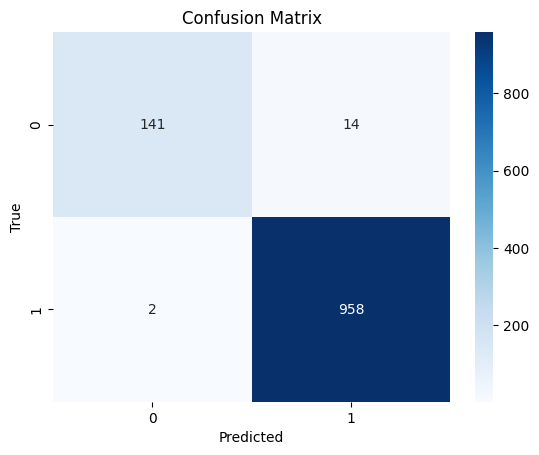

In [85]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [87]:
input_your_mail = ["You won 10000$ cash."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = best_model.predict(input_data_features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [88]:
if(prediction[0] > 0.5):  # For ANN, use the threshold of 0.5 for classification
    print('This is ham mail')
else:
    print('This is spam mail')


This is spam mail
